In [3]:
using Oceananigans
grid=RectilinearGrid(size=(64,64),x=(-5,5),z=(-5,5),topology=(Periodic,Flat,Bounded))

RectilinearGrid{Float64, Periodic, Flat, Bounded}
             architecture: CPU()
                   domain: x ∈ [-5.0, 5.0], y ∈ [1.0, 1.0], z ∈ [-5.0, 5.0]
                 topology: (Periodic, Flat, Bounded)
        size (Nx, Ny, Nz): (64, 1, 64)
        halo (Hx, Hy, Hz): (1, 0, 1)
             spacing in x: Regular, with spacing 0.15625
             spacing in y: Flattened
             spacing in z: Regular, with spacing 0.15625

In [9]:
shear_flow(x,y,z,t)=tanh(z)
stratification(x,y,z,t,p)=p.h*p.Ri*tanh(z/p.h)
U=BackgroundField(shear_flow)
B=BackgroundField(stratification,parameters=(Ri=0.1,h=1/4))

BackgroundField{typeof(stratification), NamedTuple{(:Ri, :h), Tuple{Float64, Float64}}}
├── func: stratification
└── parameters: (Ri = 0.1, h = 0.25)

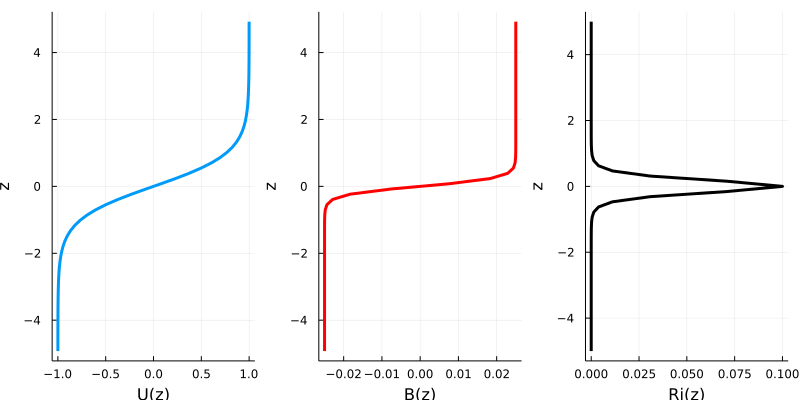

In [10]:
using Plots
zF = znodes(Face, grid)
zC = znodes(Center, grid)

Ri, h = B.parameters

kwargs = (ylabel="z", linewidth=3, label=nothing)

 U_plot = plot(shear_flow.(0, 0, zC, 0), zC; xlabel="U(z)", kwargs...)

 B_plot = plot([stratification(0, 0, z, 0, (Ri=Ri, h=h)) for z in zC], zC; xlabel="B(z)", color=:red, kwargs...)

Ri_plot = plot(@. Ri * sech(zF / h)^2 / sech(zF)^2, zF; xlabel="Ri(z)", color=:black, kwargs...) # Ri(z)= ∂_z B / (∂_z U)²; derivatives computed by hand

plot(U_plot, B_plot, Ri_plot, layout=(1, 3), size=(800, 400))

In [13]:
model = NonhydrostaticModel(timestepper = :RungeKutta3,
                              advection = UpwindBiasedFifthOrder(),
                                   grid = grid,
                               coriolis = nothing,
                      background_fields = (u=U, b=B),
                                closure = ScalarDiffusivity(ν=2e-4, κ=2e-4),
                               buoyancy = BuoyancyTracer(),
                                tracers = :b)

LoadError: UndefVarError: ScalarDiffusivity not defined